In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import multianndata as mad
import cna
import scanpy as sc
from matplotlib import pyplot as plt
from plotnine import *

In [2]:
# parameters
resolution = "major_cell_types"
analysis_name = "no_expr_pc_covars"
celltype = "NK"

In [4]:
# read in the multi anndata with GeNA phenotype information
madata = cna.read(
    f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/multianndata/{resolution}/{analysis_name}/{celltype}_scDataObject.dimreduc.pca.gena_pheno.h5ad"
)


Only considering the two last: ['.gena_pheno', '.h5ad'].
Only considering the two last: ['.gena_pheno', '.h5ad'].


Import umap and cell function scores from Lawrence's analysis

In [21]:
umap_nk = pd.read_csv(
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/data/h5/NK_cellstate/NK_cellstate_umap_subtypes.csv", index_col=0
)
cell_func_scores = pd.read_csv(
    "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/data/h5/NK_cellstate/NK_cell_function_scores.csv"
)

In [25]:
umap_nk

UMAP1      UMAP2          celltype
AAACCCACACCCAATA_S0012b  6.187087  10.757096               NK1
AAACCCACATAGAATG_S0012b  4.503816   7.669902               NK1
AAACCCACATCGCTCT_S0012b  4.311159  13.511112               NK1
AAACCCACATGGGATG_S0012b  6.395042   7.039422               NK1
AAACGAAAGCGAACTG_S0012b  4.829165  10.319350               NK1
...                           ...        ...               ...
TTGTTGTCAACTCATG_S0170   1.956484   9.725125     NK_CD56bright
TTGTTGTCAGACAAGC_S0170   0.962554  10.443008     NK_CD56bright
TTTCATGAGGACGCAT_S0170   1.306305  11.687542     NK_CD56bright
TTTCCTCGTAGGTCAG_S0170   0.897204  11.009116     NK_CD56bright
TTTCGATTCGCGCTGA_S0170   4.794615   3.203448  NK_Proliferating

[850833 rows x 3 columns]

In [26]:
madata.obsm["X_umap"] = umap_nk.reindex(madata.obs.index).loc[:, ["UMAP1", "UMAP2"]].to_numpy(dtype="float32")

In [27]:
madata.obs = madata.obs.join(umap_nk.loc[:, "celltype"])

In [28]:
madata.obs

id sequencing_library    cohort  \
AAACCCAAGAGTCTGG_S0056a  CPG247833             S0056a  BioHEART   
AAACCCAAGCCGCTTG_S0056a  CPG248245             S0056a  BioHEART   
AAACCCAAGTCATAGA_S0056a  CPG248245             S0056a  BioHEART   
AAACCCACAAGCACCC_S0056a  CPG248245             S0056a  BioHEART   
AAACCCATCAATCCAG_S0056a  CPG248245             S0056a  BioHEART   
...                            ...                ...       ...   
TTTGGTTCAAGTTTGC_S0176   CPG500249              S0176  BioHEART   
TTTGGTTGTTGACTAC_S0176   CPG500082              S0176  BioHEART   
TTTGTTGAGATCACTC_S0176   CPG500249              S0176  BioHEART   
TTTGTTGGTGAGCGAT_S0176   CPG500249              S0176  BioHEART   
TTTGTTGGTGTTCCTC_S0176   CPG500249              S0176  BioHEART   

                        wg2_scpred_prediction  npheno_16:128736:C:G  \
AAACCCAAGAGTCTGG_S0056a                    NK              0.010931   
AAACCCAAGCCGCTTG_S0056a                    NK              0.033553   
AAACCCAAGTCATAGA_S0056a                    NK             -0.089434   
AAACCCACAAGCACCC_S0056a                    NK             -0.113428   
AAACCCATCAATCCAG_S0056a                    NK              0.028276   
...                                       ...                   ...   
TTTGGTTCAAGTTTGC_S0176                     NK             -0.086536   
TTTGGTTGTTGACTAC_S0176                     NK              0.045585   
TTTGTTGAGATCACTC_S0176                     NK             -0.014086   
TTTGTTGGTGAGCGAT_S0176                     NK             -0.008125   
TTTGTTGGTGTTCCTC_S0176          NK_CD56bright              0.015459   

                         npheno_11:128246346:T:TA  npheno_19:16331208:G:A  \
AAACCCAAGAGTCTGG_S0056a                 -0.010724                0.033785   
AAACCCAAGCCGCTTG_S0056a                 -0.001591                0.029158   
AAACCCAAGTCATAGA_S0056a                 -0.042308               -0.033424   
AAACCCACAAGCACCC_S0056a                 -0.014529               -0.103215   
AAACCCATCAATCCAG_S0056a                 -0.007459                0.028156   
...                                           ...                     ...   
TTTGGTTCAAGTTTGC_S0176                  -0.042795               -0.095730   
TTTGGTTGTTGACTAC_S0176                  -0.015396                0.033319   
TTTGTTGAGATCACTC_S0176                  -0.006350               -0.018503   
TTTGTTGGTGAGCGAT_S0176                  -0.027532               -0.017589   
TTTGTTGGTGTTCCTC_S0176                  -0.011804                0.007682   

                         npheno_2:111050100:G:A  npheno_21:13891042:T:C  \
AAACCCAAGAGTCTGG_S0056a               -0.041284                0.011425   
AAACCCAAGCCGCTTG_S0056a               -0.021010                0.022114   
AAACCCAAGTCATAGA_S0056a                0.093543               -0.030951   
AAACCCACAAGCACCC_S0056a                0.055163               -0.029837   
AAACCCATCAATCCAG_S0056a               -0.016034                0.019848   
...                                         ...                     ...   
TTTGGTTCAAGTTTGC_S0176                 0.070123               -0.042468   
TTTGGTTGTTGACTAC_S0176                -0.038735                0.027949   
TTTGTTGAGATCACTC_S0176                -0.010602                0.006299   
TTTGTTGGTGAGCGAT_S0176                -0.032588                0.019286   
TTTGTTGGTGTTCCTC_S0176                -0.190353                0.049527   

                         npheno_1:143272081:G:C  npheno_3:15163210:T:TC  \
AAACCCAAGAGTCTGG_S0056a               -0.008120                0.062569   
AAACCCAAGCCGCTTG_S0056a               -0.019987                0.032852   
AAACCCAAGTCATAGA_S0056a                0.136585               -0.109375   
AAACCCACAAGCACCC_S0056a                0.147151               -0.144392   
AAACCCATCAATCCAG_S0056a               -0.025024                0.038846   
...                                         ...                     ...   
TTTGGTTCAAGTTTGC_S0176 

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


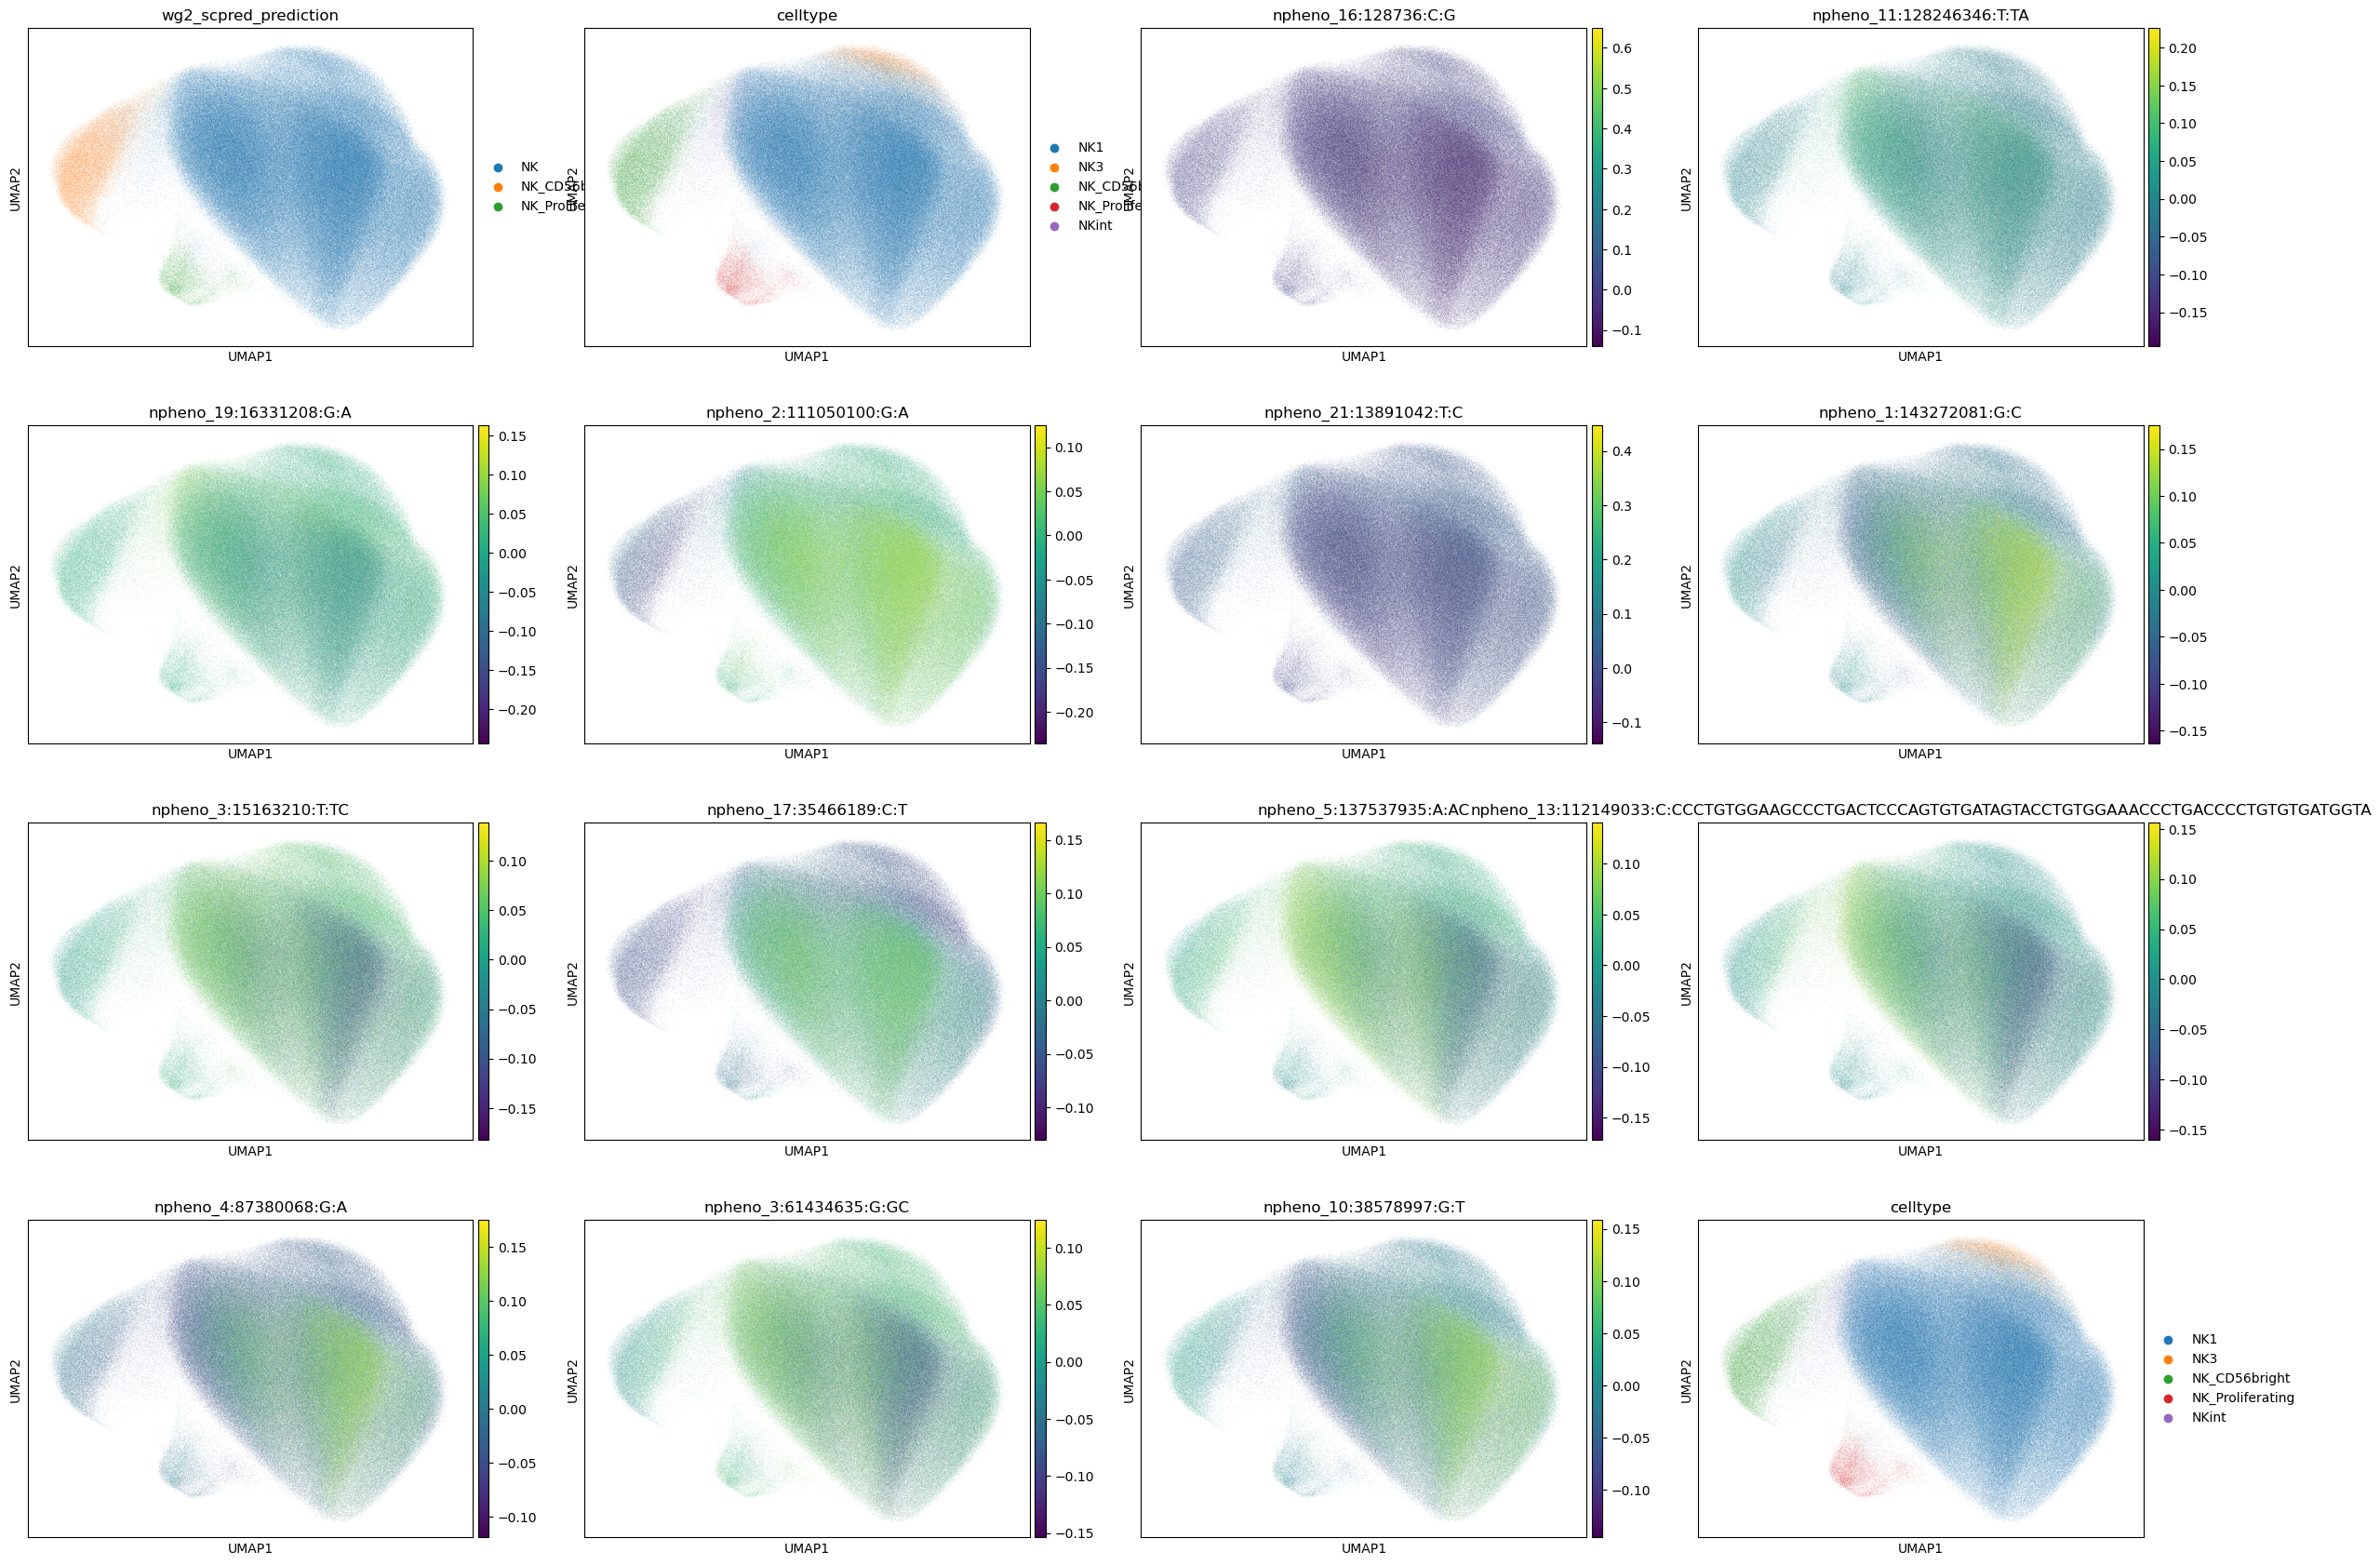

In [30]:
# plot neighbourhood abundance correllations

sc.pl.umap(
    madata, color=["wg2_scpred_prediction", "celltype"] + madata.obs.columns[4:].tolist()
)

# Validation - replicating Onek1k csaQTLs

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


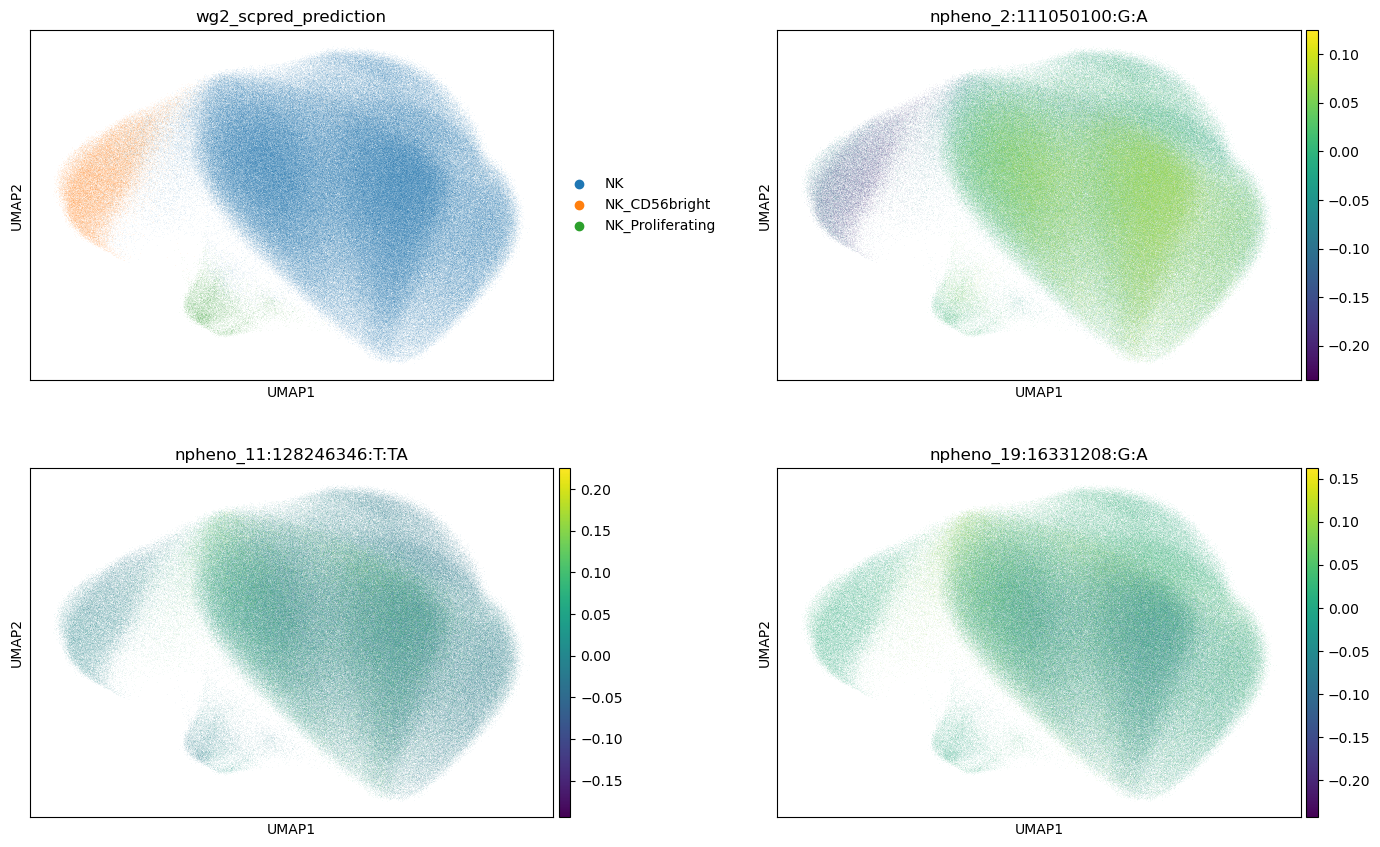

In [32]:
onek1k_intersecting_nk = [
    "npheno_2:111050100:G:A",
    "npheno_11:128246346:T:TA",     # "11:128246346:T:T" in GeNA paper 
    "npheno_19:16331208:G:A",
]
sc.pl.umap(
    madata,
    color=["wg2_scpred_prediction"] + onek1k_intersecting_nk,
    wspace=0.3,
    ncols=2
)

In [ ]:
variant = "19:16331208:G:A"

sample_pheno = madata.samplem.loc[:,[f"spheno_{variant}", variant]]

# Convert dosage from numeric encoding to actual genotypes
# genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}


def geno_to_letters(ref, alt, geno):
    if geno == 0:
        out = f"{ref}/{ref}"
    elif geno == 1:
        out = f"{ref}/{alt}"
    elif geno == 2:
        out = f"{alt}/{alt}"
    elif geno == -9 or np.isnan(geno):
        out = "Missing genotype"
    else:
        raise ValueError(f"Unexpected genotype value: {geno}")
    return out

ref, alt = variant.split(":")[2:4]

sample_pheno["Genotype"] = [geno_to_letters(ref, alt, g) for g in sample_pheno[variant]]

ct_col = color_pal.loc[
    color_pal["major_cell_type"] == celltype, "color_major_cell_type"
].unique()[0]

vlnplot = (
    ggplot(sample_pheno, aes(x="Genotype", y=f"spheno_{variant}"))
    + geom_violin(color=ct_col, fill=ct_col)
    # + geom_sina()
    + geom_boxplot(fill=None, width=0.1, outlier_shape="")
    + theme_classic()
    + theme(text=element_text(size=20), title=element_text(hjust=0.5))
    + labs(y="Sample-level phenotype", title=variant)
)  
vlnplot.save(
    filename=f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/figures/{resolution}/boxplots/intersections_real_geno/plotnine/{celltype}_{variant}_boxplot.pdf",
    width=5,
    height=5
)

In [ ]:
def csaqtl_boxplot(madata, variant_id_list):

    for variant in variant_id_list:
        variant = "2:111050100:G:A"
        sample_pheno = madata.samplem[[f"npheno_{variant}", variant]]
        sample_pheno.index = madata.uns["NAM_sampleXpc"].index

        # Convert dosage from numeric encoding to actual genotypes
        genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

        def geno_to_letters(ref, alt, geno):
            if geno == 0:
                out = f"{ref}/{ref}"
            elif geno == 1:
                out = f"{ref}/{alt}"
            elif geno == 2:
                out = f"{alt}/{alt}"
            elif geno == -9:
                out = "Missing genotype"
            return out

        ref, alt = genotypes_dict[variant]

        sample_pheno["Genotype"] = [
            geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
        ]

        plot_order = [f"{ref}/{ref}", f"{ref}/{alt}", f"{alt}/{alt}"]

        sns.set_theme(style="darkgrid")
        ax = sns.boxplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            showfliers=False,
            order=plot_order
        )
        ax = sns.swarmplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            color="grey",
            size=1,
            # order=plot_order,
        ).set(title=f"{celltype}, P = {P}, {permuted}")
        # plt.savefig(
        #     fname=f"{figdir}/{resolution}/boxplots/intersections_real_geno/{celltype}_{analysis_name}_{variant}_intersecting_curated_deficiency_genes_box_plot.png",
        #     dpi=300,
        # )
        # plt.clf()
        plt.show()

Here we can see replication of the csaQTL discovered in the onek1k cohort. This is most obvious for 2:111050100:G:A, where the alternate allele is associated with depletion of the NK CD65 bright cells. 

# Exploring csaQTL intersecting Tcell Abundance GWAS

In [ ]:
sc.pl.umap(
    madata, color=["wg2_scpred_prediction", "npheno_19:16331208:G:A"], wspace=0.3
)